<a href="https://colab.research.google.com/github/fatday/TradingGame_P3/blob/main/Round1/Round1_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read prices data
prices_name = ["prices_round_1_day_-2.csv","prices_round_1_day_-1.csv","prices_round_1_day_0.csv"]
trades_name = ["trades_round_1_day_-2.csv","trades_round_1_day_-1.csv","trades_round_1_day_0.csv"]

In [4]:
# read all data
prices = pd.concat([pd.read_csv(f, delimiter=';') for f in prices_name])
prices

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,RAINFOREST_RESIN,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,KELP,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,20,NaN,NaN,NaN,NaN,2000.0,0.0
4,-2,100,RAINFOREST_RESIN,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,999800,KELP,2032,27,NaN,NaN,NaN,NaN,2034,1,2035.0,27.0,NaN,NaN,2033.0,0.0
29996,0,999800,RAINFOREST_RESIN,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
29997,0,999900,RAINFOREST_RESIN,9996,2,9995.0,21.0,NaN,NaN,10004,2,10005.0,21.0,NaN,NaN,10000.0,0.0
29998,0,999900,SQUID_INK,1838,23,NaN,NaN,NaN,NaN,1841,23,NaN,NaN,NaN,NaN,1839.5,0.0


In [5]:
def compute_weighted_mid(row):
    bid_total = ask_total = 0
    bid_weight = ask_weight = 0

    for i in range(1, 4):
        # Get bid info
        bp = row.get(f'bid_price_{i}')
        bv = row.get(f'bid_volume_{i}')
        if pd.notnull(bp) and pd.notnull(bv):
            bid_total += bp * bv
            bid_weight += bv

        # Get ask info
        ap = row.get(f'ask_price_{i}')
        av = row.get(f'ask_volume_{i}')
        if pd.notnull(ap) and pd.notnull(av):
            ask_total += ap * av
            ask_weight += av

    total_weight = bid_weight + ask_weight
    if total_weight == 0:
        return np.nan  # if no valid bid/ask, return NaN
    return (bid_total + ask_total) / total_weight

In [6]:
prices['weighted_mid_price'] = prices.apply(compute_weighted_mid, axis=1)

In [7]:
prices

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,weighted_mid_price
0,-2,0,RAINFOREST_RESIN,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0,10000.000000
1,-2,0,KELP,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0,2000.000000
2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0,2000.000000
3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,20,NaN,NaN,NaN,NaN,2000.0,0.0,1999.274510
4,-2,100,RAINFOREST_RESIN,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0,10000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,999800,KELP,2032,27,NaN,NaN,NaN,NaN,2034,1,2035.0,27.0,NaN,NaN,2033.0,0.0,2033.509091
29996,0,999800,RAINFOREST_RESIN,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0,10000.000000
29997,0,999900,RAINFOREST_RESIN,9996,2,9995.0,21.0,NaN,NaN,10004,2,10005.0,21.0,NaN,NaN,10000.0,0.0,10000.000000
29998,0,999900,SQUID_INK,1838,23,NaN,NaN,NaN,NaN,1841,23,NaN,NaN,NaN,NaN,1839.5,0.0,1839.500000


In [8]:
RESIN_data = prices[prices['product'] == 'RAINFOREST_RESIN']
KELP_data = prices[prices['product'] == 'KELP']
INK_data = prices[prices['product'] == 'SQUID_INK']

In [9]:
RESIN_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,weighted_mid_price
0,-2,0,RAINFOREST_RESIN,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0,10000.000000
4,-2,100,RAINFOREST_RESIN,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0,10000.000000
8,-2,200,RAINFOREST_RESIN,9996,1,9995.0,30.0,NaN,NaN,10004,1,10005.0,30.0,NaN,NaN,10000.0,0.0,10000.000000
9,-2,300,RAINFOREST_RESIN,9996,1,9995.0,26.0,NaN,NaN,10004,1,10005.0,26.0,NaN,NaN,10000.0,0.0,10000.000000
12,-2,400,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,9998,3,10002.0,9.0,10005.0,20.0,9996.5,0.0,10000.230769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29985,0,999500,RAINFOREST_RESIN,9995,28,NaN,NaN,NaN,NaN,10002,6,10005.0,28.0,NaN,NaN,9998.5,0.0,10000.193548
29988,0,999600,RAINFOREST_RESIN,9996,2,9995.0,27.0,NaN,NaN,10002,3,10004.0,2.0,10005.0,27.0,9999.0,0.0,10000.098361
29992,0,999700,RAINFOREST_RESIN,9996,2,9995.0,24.0,NaN,NaN,10004,2,10005.0,24.0,NaN,NaN,10000.0,0.0,10000.000000
29996,0,999800,RAINFOREST_RESIN,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0,10000.000000


In [10]:
INK_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,weighted_mid_price
2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0,2000.000000
3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,20,NaN,NaN,NaN,NaN,2000.0,0.0,1999.274510
7,-2,200,SQUID_INK,1997,31,NaN,NaN,NaN,NaN,2000,1,2001.0,30.0,NaN,NaN,1998.5,0.0,1998.983871
11,-2,300,SQUID_INK,1997,27,NaN,NaN,NaN,NaN,2000,27,NaN,NaN,NaN,NaN,1998.5,0.0,1998.500000
14,-2,400,SQUID_INK,1996,20,NaN,NaN,NaN,NaN,2000,20,NaN,NaN,NaN,NaN,1998.0,0.0,1998.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,0,999500,SQUID_INK,1830,28,NaN,NaN,NaN,NaN,1833,28,NaN,NaN,NaN,NaN,1831.5,0.0,1831.500000
29989,0,999600,SQUID_INK,1832,7,1831.0,29.0,NaN,NaN,1834,2,1835.0,27.0,NaN,NaN,1833.0,0.0,1832.861538
29993,0,999700,SQUID_INK,1834,1,1832.0,26.0,NaN,NaN,1835,26,NaN,NaN,NaN,NaN,1834.5,0.0,1833.509434
29994,0,999800,SQUID_INK,1837,27,NaN,NaN,NaN,NaN,1839,1,1840.0,27.0,NaN,NaN,1838.0,0.0,1838.509091


In [11]:
KELP_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,weighted_mid_price
1,-2,0,KELP,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0,2000.000000
5,-2,100,KELP,2000,5,1999.0,6.0,1998.0,20.0,2002,20,NaN,NaN,NaN,NaN,2001.0,0.0,1999.882353
6,-2,200,KELP,1999,1,1998.0,30.0,NaN,NaN,2002,31,NaN,NaN,NaN,NaN,2000.5,0.0,2000.016129
10,-2,300,KELP,1999,27,NaN,NaN,NaN,NaN,2002,27,NaN,NaN,NaN,NaN,2000.5,0.0,2000.500000
13,-2,400,KELP,1999,20,NaN,NaN,NaN,NaN,2002,20,NaN,NaN,NaN,NaN,2000.5,0.0,2000.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29987,0,999500,KELP,2032,28,NaN,NaN,NaN,NaN,2035,28,NaN,NaN,NaN,NaN,2033.5,0.0,2033.500000
29990,0,999600,KELP,2032,36,NaN,NaN,NaN,NaN,2035,29,NaN,NaN,NaN,NaN,2033.5,0.0,2033.338462
29991,0,999700,KELP,2034,1,2032.0,26.0,NaN,NaN,2035,26,NaN,NaN,NaN,NaN,2034.5,0.0,2033.509434
29995,0,999800,KELP,2032,27,NaN,NaN,NaN,NaN,2034,1,2035.0,27.0,NaN,NaN,2033.0,0.0,2033.509091


<Axes: >

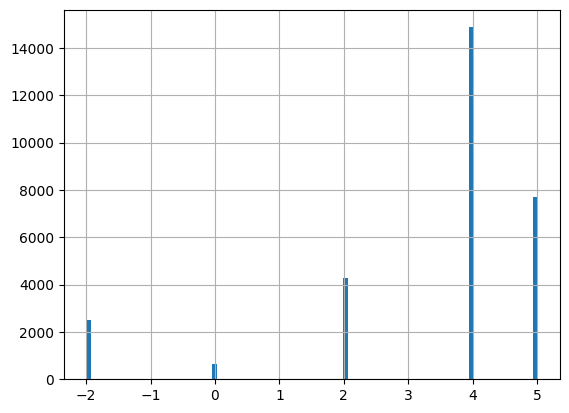

In [32]:
(RESIN_data["ask_price_1"]-10000).hist(bins=100)

<Axes: >

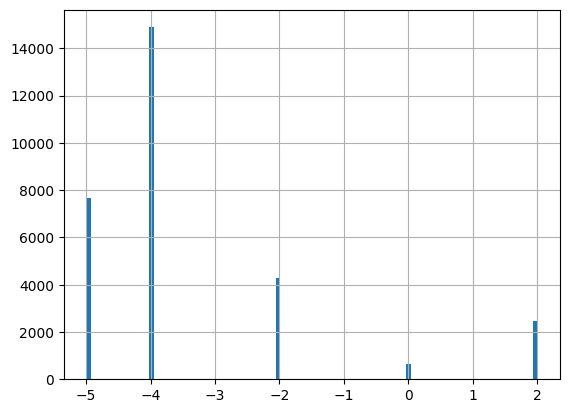

In [30]:
(RESIN_data["bid_price_1"]-10000).hist(bins=100)

<Axes: >

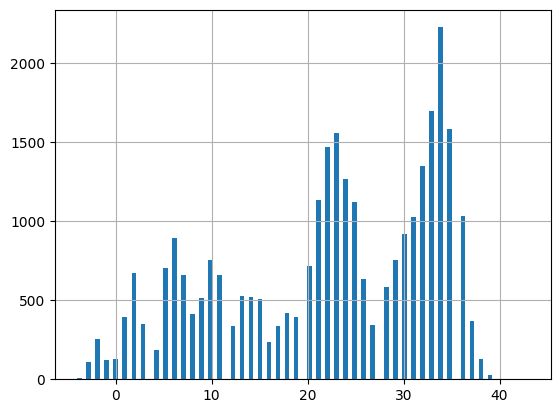

In [19]:
(KELP_data["bid_price_1"] - 2000).hist(bins=100)

In [14]:
(INK_data["weighted_mid_price"] - 2000).describe()

,weighted_mid_price
count,30000.000000
mean,-28.870405
std,67.898800
min,-189.500000
25%,-64.000000
50%,-35.000000
75%,-0.529412
max,187.388060


In [15]:
from statsmodels.tsa.stattools import coint

score, pvalue, _ = coint(RESIN_data['weighted_mid_price'], INK_data['weighted_mid_price']-2000)
print("p-value:", pvalue)

p-value: 0.0


In [36]:
import statsmodels.api as sm
X = sm.add_constant((INK_data['weighted_mid_price']-2000).reset_index(drop=True))
y = RESIN_data['weighted_mid_price'].reset_index(drop=True)

model = sm.OLS(X,y).fit()
beta = model.params[1]
print("Hedge ratio (beta):", beta)

Hedge ratio (beta): weighted_mid_price   -0.002887
Name: 1, dtype: float64


In [38]:
spread = (INK_data['weighted_mid_price'] - 2000) - -0.002887 * RESIN_data['weighted_mid_price']
spread

,weighted_mid_price
0,32.885873
0,32.885778
1,NaN
2,NaN
2,NaN
...,...
29996,2.370000
29997,1.414118
29997,1.414118
29998,NaN


In [39]:
spread_mean = spread.mean()
spread_std = spread.std()
zscore = (spread - spread_mean) / spread_std

In [50]:
spread_std

63.12710010949055

In [41]:
zscore.describe()

,weighted_mid_price
count,2.509800e+04
mean,-4.189988e-17
std,1.000000e+00
min,-2.619478e+00
25%,-4.334123e-01
50%,-1.260204e-01
75%,3.903145e-01
max,3.350827e+00


#

In [49]:
cleaned = (spread > 2)[~(spread > 1).index.duplicated(keep='first')]
signal_indices = cleaned[cleaned].index.to_list()

In [75]:
(INK_data[['ask_price_1', "bid_price_1", "weighted_mid_price"]]-2000).head(30)

,ask_price_1,bid_price_1,weighted_mid_price
2,2,-2,0.000000
3,1,-1,-0.725490
7,0,-3,-1.016129
11,0,-3,-1.500000
14,0,-4,-2.000000
15,0,-1,-1.491803
19,1,-3,-1.000000
23,2,-1,0.500000
26,3,2,1.021277
27,1,-1,-0.516129


In [74]:
(RESIN_data[['ask_price_1', "bid_price_1"]]-10000).head(300)

,ask_price_1,bid_price_1
0,4,-4
4,5,0
8,4,-4
9,4,-4
12,-2,-5
...,...,...
887,-2,-4
889,4,-4
891,4,-4
894,4,-4


<Figure size 1200x500 with 0 Axes>

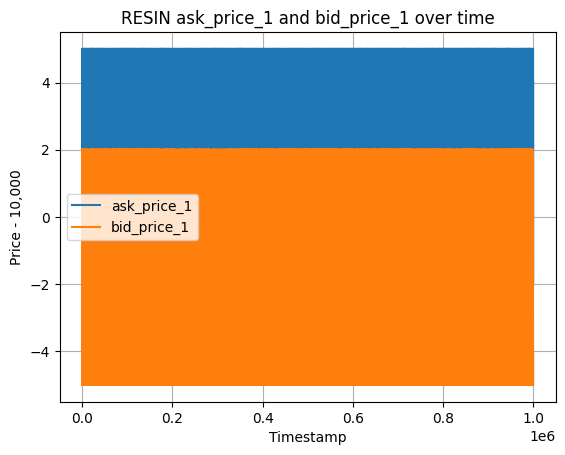

In [61]:
ts_data = RESIN_data[['timestamp', 'ask_price_1', 'bid_price_1']].copy()
ts_data[['ask_price_1', 'bid_price_1']] -= 10000

# Set timestamp as index and sort
ts_data = ts_data.sort_values('timestamp').set_index('timestamp')
plt.figure(figsize=(12, 5))
ts_data.plot()
plt.title('RESIN ask_price_1 and bid_price_1 over time')
plt.xlabel('Timestamp')
plt.ylabel('Price - 10,000')
plt.grid(True)
plt.show()

In [25]:
int(43 * 0.61) + int(43 * 0.24) + int(43 * 0.15)

42

In [26]:
from datamodel import OrderDepth, UserId, TradingState, Order
from typing import List
import string

class Trader:

    def RAINFOREST_RESIN_fun(self, position, best_bid, best_ask, mid_price, total_ask_vol, total_bid_vol, depth_imbalance_bid, depth_imbalance_ask, volume_imbalance, ratio_bid1, ratio_ask1, weighted_mid, bid_prices, bid_vol, ask_prices, ask_vol):
      orders = []
      max_buy_limit = 50 - position
      max_sell_limit = 50 + position
      level_ratio = [0.75, 0.2, 0.05]
      basic_limit = 3
      buy_amount, sell_amount, buy_amount2, sell_amount2 = [], [], [], []
      for i in range(3):
        buy_amount.append(int(level_ratio[i] * max_buy_limit))
        sell_amount.append(int(level_ratio[i] * max_sell_limit))
        buy_amount2.append(min(int(level_ratio[i] * max_buy_limit),basic_limit))
        sell_amount2.append(min(int(level_ratio[i] * max_sell_limit),basic_limit))
      if mid_price != 10000:
        steps = [0, 1, 2]
        for i in range(3):
          if mid_price < 10000:
            orders.append(Order("RAINFOREST_RESIN", int(best_ask + steps[i] - 1), buy_amount[i]))
            orders.append(Order("RAINFOREST_RESIN", int(best_bid - steps[i] + 1), -sell_amount2[i]))
          else:
            orders.append(Order("RAINFOREST_RESIN", int(best_ask + steps[i]), buy_amount2[i]))
            orders.append(Order("RAINFOREST_RESIN", int(best_bid - steps[i]), -sell_amount[i]))
      else:
        # do something
        steps = [1, 2, 3]
        for i in range(3):
          orders.append(Order("RAINFOREST_RESIN", 10000 + steps[i], buy_amount2[i]))
          orders.append(Order("RAINFOREST_RESIN", 10000 - steps[i], -sell_amount2[i]))

      return orders


    def SQUID_INK_fun(self, position, best_bid, best_ask, mid_price, total_ask_vol, total_bid_vol, depth_imbalance_bid, depth_imbalance_ask, volume_imbalance, ratio_bid1, ratio_ask1, weighted_mid, bid_prices, bid_vol, ask_prices, ask_vol):
      orders = []


      return orders



    def KELP_fun(self, position, best_bid, best_ask, mid_price, total_ask_vol, total_bid_vol, depth_imbalance_bid, depth_imbalance_ask, volume_imbalance, ratio_bid1, ratio_ask1, weighted_mid, bid_prices, bid_vol, ask_prices, ask_vol):
      orders = []


      return orders



    def calculate_indicators(self, depth: OrderDepth):
      # buy
      bid_prices = [0] * 3
      bid_vol = [0] * 3
      ask_prices = [0] * 3
      ask_vol = [0] * 3
      if len(depth.buy_orders) != 0:
        buys = list(depth.buy_orders.items())
        for i in range(min(3,len(buys))):
          bid, bid_amt = buys[i]
          bid_prices[i] = bid * 1.0
          bid_vol[i] = bid_amt

      if len(depth.sell_orders) != 0:
        sells = list(depth.sell_orders.items())
        for i in range(min(3,len(sells))):
          ask, ask_amt = sells[i]
          ask_prices[i] = ask * 1.0
          ask_vol[i] = ask_amt

      mid_price = 1.0*(ask_prices[0] + bid_prices[0])/ 2
      best_bid = bid_prices[0] if len(bid_prices) == 0 else (bid_prices[0] + bid_prices[1]) / 2.0
      best_ask = ask_prices[0] if len(ask_prices) == 0 else (ask_prices[0] + ask_prices[1]) / 2.0
      total_ask_vol = sum(ask_vol)
      total_bid_vol = sum(bid_vol)
      depth_imbalance_bid = bid_vol[0] - bid_vol[1]
      depth_imbalance_ask = ask_vol[0] - ask_vol[1]
      volume_imbalance = total_bid_vol - total_ask_vol
      ratio_bid1 = bid_prices[0] / mid_price
      ratio_ask1 = ask_prices[0] / mid_price
      weighted_mid = mid_price
      if ask_vol[0] + bid_vol[0] != 0:
          weighted_mid = (ask_vol[0]*bid_prices[0] + bid_vol[0]*ask_prices[0]) / (ask_vol[0] + bid_vol[0])
      return best_bid, best_ask, mid_price, total_ask_vol, total_bid_vol, depth_imbalance_bid, depth_imbalance_ask, volume_imbalance, ratio_bid1, ratio_ask1, weighted_mid, bid_prices, bid_vol, ask_prices, ask_vol

    def run(self, state: TradingState):
        # Only method required. It takes all buy and sell orders for all symbols as an input, and outputs a list of orders to be sent
        print("traderData: " + state.traderData)
        print("Observations: " + str(state.observations))
        result = {}
        for product in state.order_depths:
            OrderDepth = state.order_depths[product]
            position = state.position[product] if product in state.position else 0
            best_bid, best_ask, mid_price, total_ask_vol, total_bid_vol, depth_imbalance_bid, depth_imbalance_ask, volume_imbalance, ratio_bid1, ratio_ask1, weighted_mid, bid_prices, bid_vol, ask_prices, ask_vol = self.calculate_indicators(OrderDepth)

            if product == "RAINFOREST_RESIN":
              orders = self.RAINFOREST_RESIN_fun(position, best_bid, best_ask, mid_price, total_ask_vol, total_bid_vol, depth_imbalance_bid, depth_imbalance_ask, volume_imbalance, ratio_bid1, ratio_ask1, weighted_mid, bid_prices, bid_vol, ask_prices, ask_vol)
              if len(orders) == 0:
                continue
              result[product] = orders
            elif product == "SQUID_INK":
              orders = self.SQUID_INK_fun(position, best_bid, best_ask, mid_price, total_ask_vol, total_bid_vol, depth_imbalance_bid, depth_imbalance_ask, volume_imbalance, ratio_bid1, ratio_ask1, weighted_mid, bid_prices, bid_vol, ask_prices, ask_vol)
              if len(orders) == 0:
                continue
              result[product] = orders
            elif product == "KELP":
              orders = self.KELP_fun(position, best_bid, best_ask, mid_price, total_ask_vol, total_bid_vol, depth_imbalance_bid, depth_imbalance_ask, volume_imbalance, ratio_bid1, ratio_ask1, weighted_mid, bid_prices, bid_vol, ask_prices, ask_vol)
              if len(orders) == 0:
                continue
              result[product] = orders

            #best_bid, best_ask, mid_price, total_ask_vol, total_bid_vol, depth_imbalance_bid, depth_imbalance_ask, volume_imbalance, ratio_bid1, ratio_ask1, weighted_mid, bid_prices, bid_vol, ask_prices, ask_vol = self.calculate_indicators(OrderDepth)
            #orders = function_mapping[product](position, best_bid, best_ask, mid_price, total_ask_vol, total_bid_vol, depth_imbalance_bid, depth_imbalance_ask, volume_imbalance, ratio_bid1, ratio_ask1, weighted_mid, bid_prices, bid_vol, ask_prices, ask_vol)



            # orders.append(Order(product, ask_order_price, -ask_amt))
            # orders.append(Order(product, bid_order_price, bid_amt))

        traderData = ""
        conversions = 0
        return result, conversions, traderData